<a href="https://colab.research.google.com/github/rallyfranky/my-first-repo/blob/main/%E6%99%82%E7%B3%BB%E5%88%97Pyrhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from scipy import signal

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [2]:
df=pd.read_csv('/content/drive/MyDrive/AirPassengers.csv',
               header=0,
               names=['Month','Passengers'],
               parse_dates=True)
df=df.dropna()
df

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


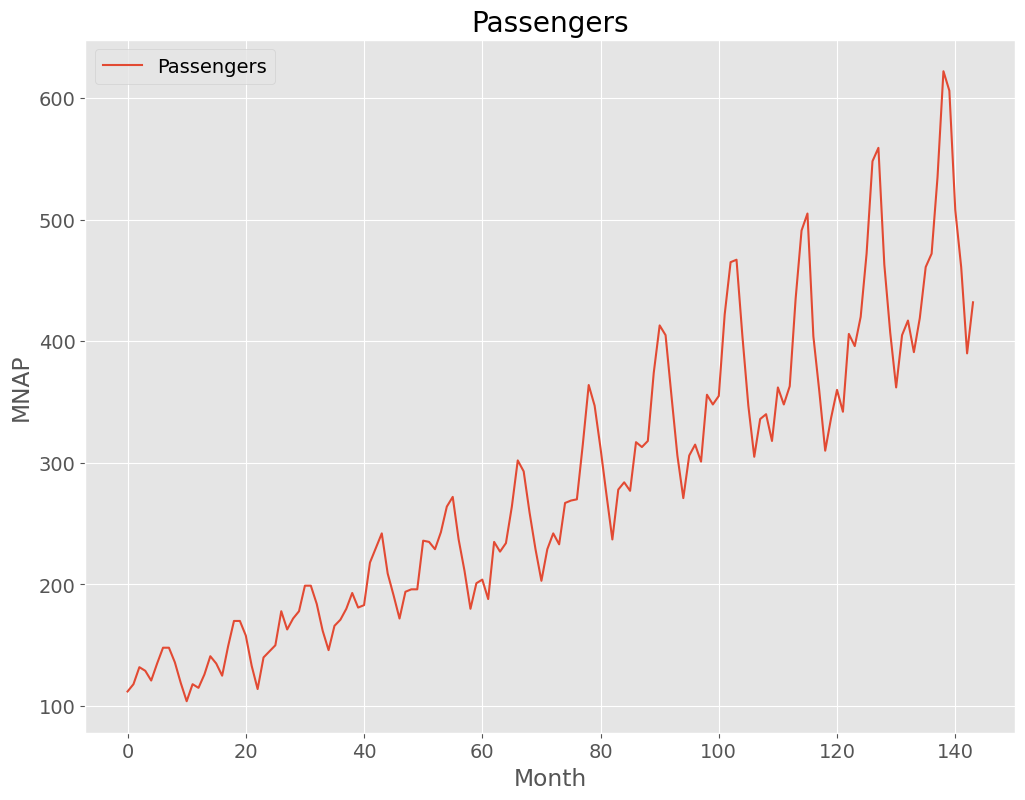

In [3]:
df.plot()

plt.title('Passengers')
plt.ylabel('MNAP')
plt.xlabel('Month')

plt.show()

加法移動平均法による要素分解

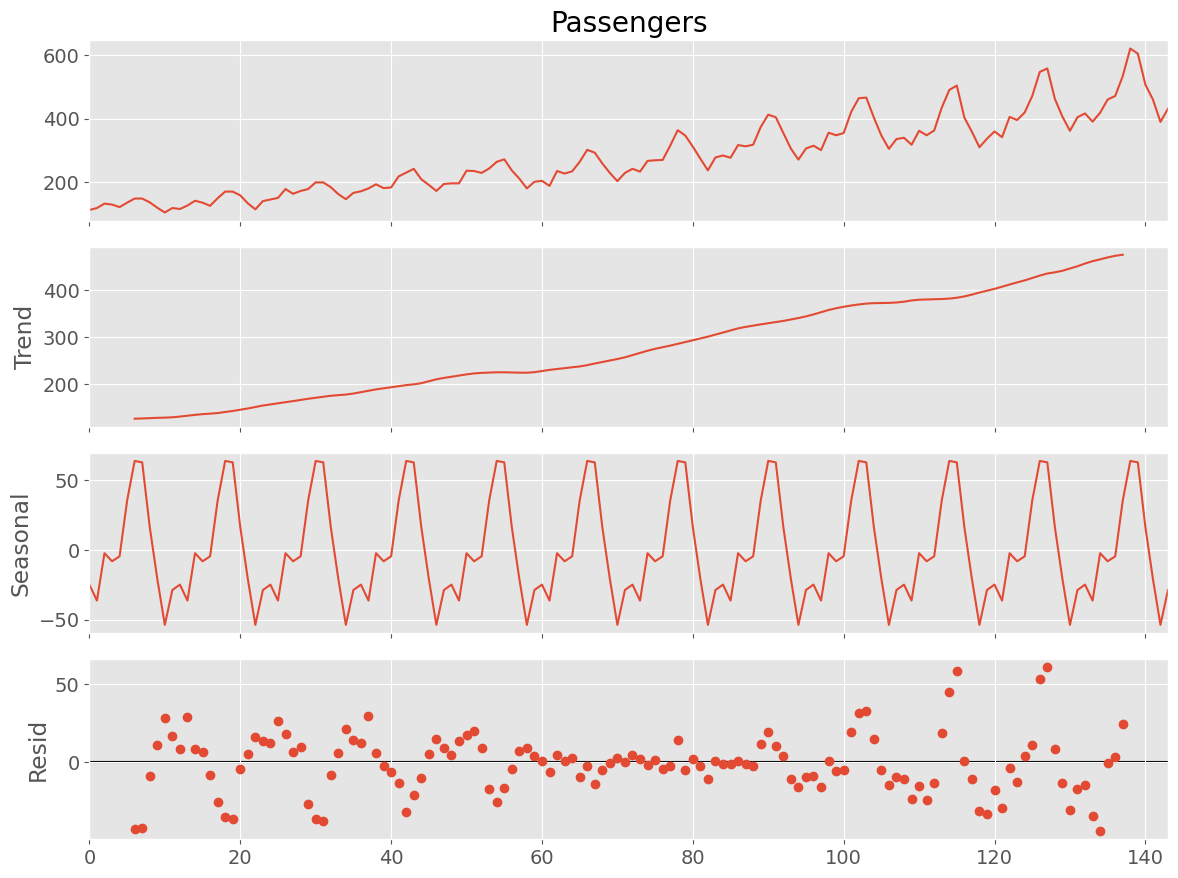

In [4]:
result=seasonal_decompose(
    df.Passengers,
    model='addictive',#加法モデル
    period=12)

result.plot()
plt.show()

乗法モデルによる移動平均法

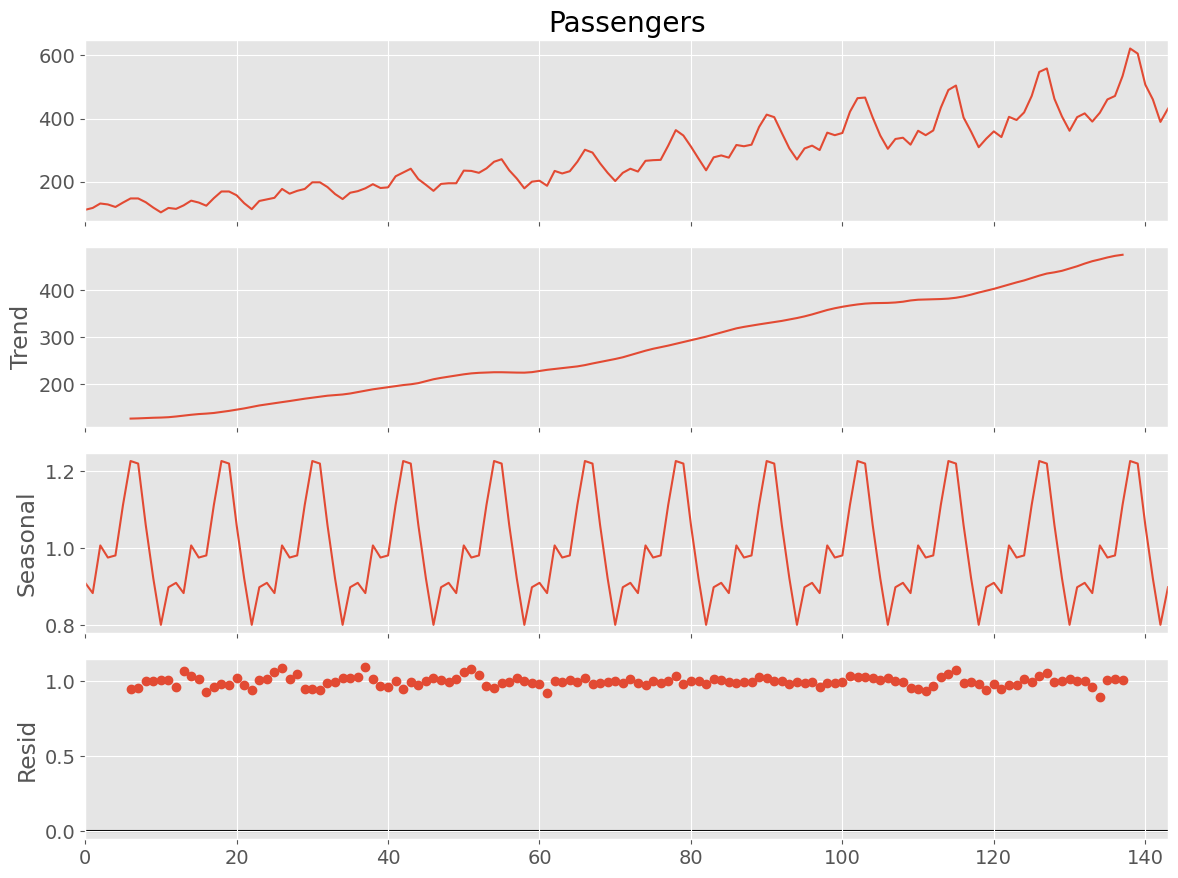

In [5]:
result=seasonal_decompose(
    df.Passengers,
    model='multiplicative',#加法モデル
    period=12)

result.plot()
plt.show()

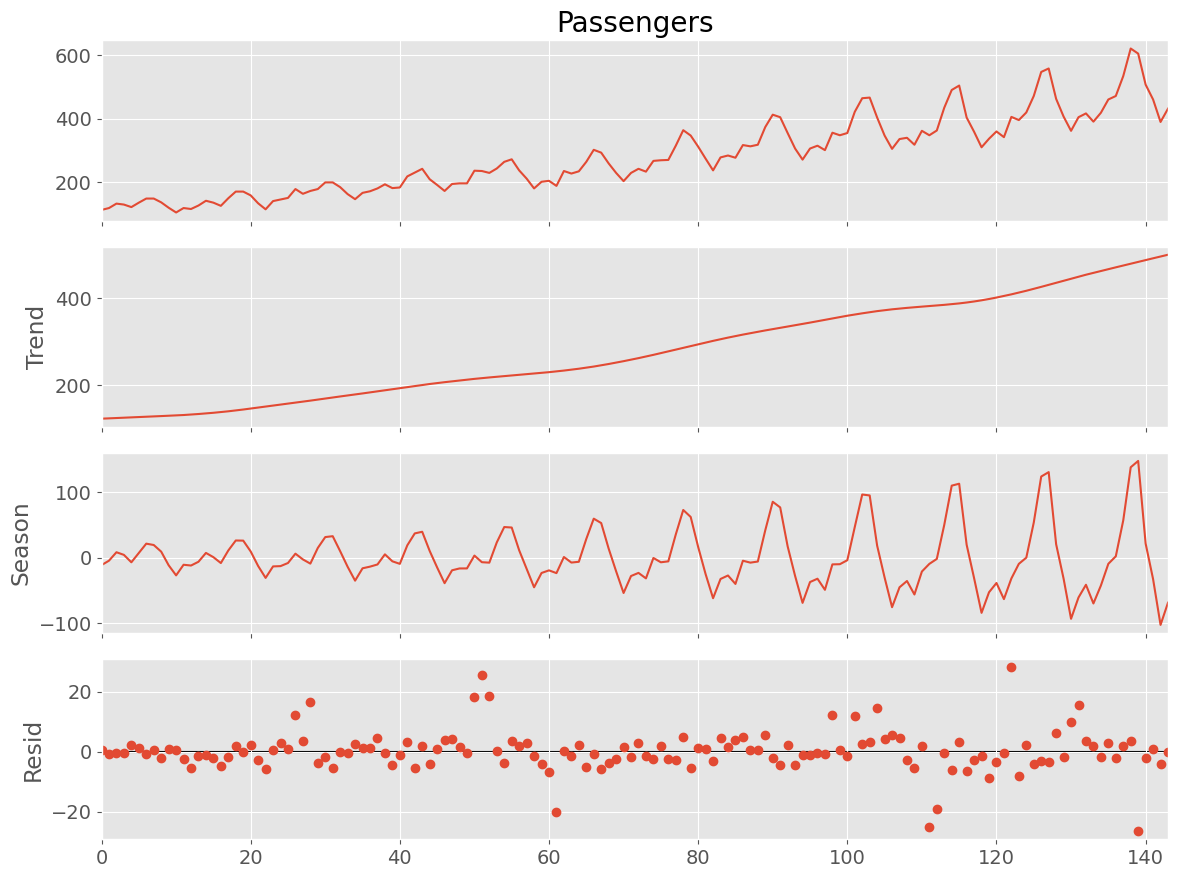

In [6]:
stl=STL(
    df.Passengers,
    period=12,
    robust=True).fit()

stl.plot()
plt.show()

In [7]:
#ADF検定

dftest=adfuller(df.Passengers)

print('ADF Statistic', dftest[0])
print('P-value', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
  print('\t',i ,j)

ADF Statistic 0.8153688792060498
P-value 0.991880243437641
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


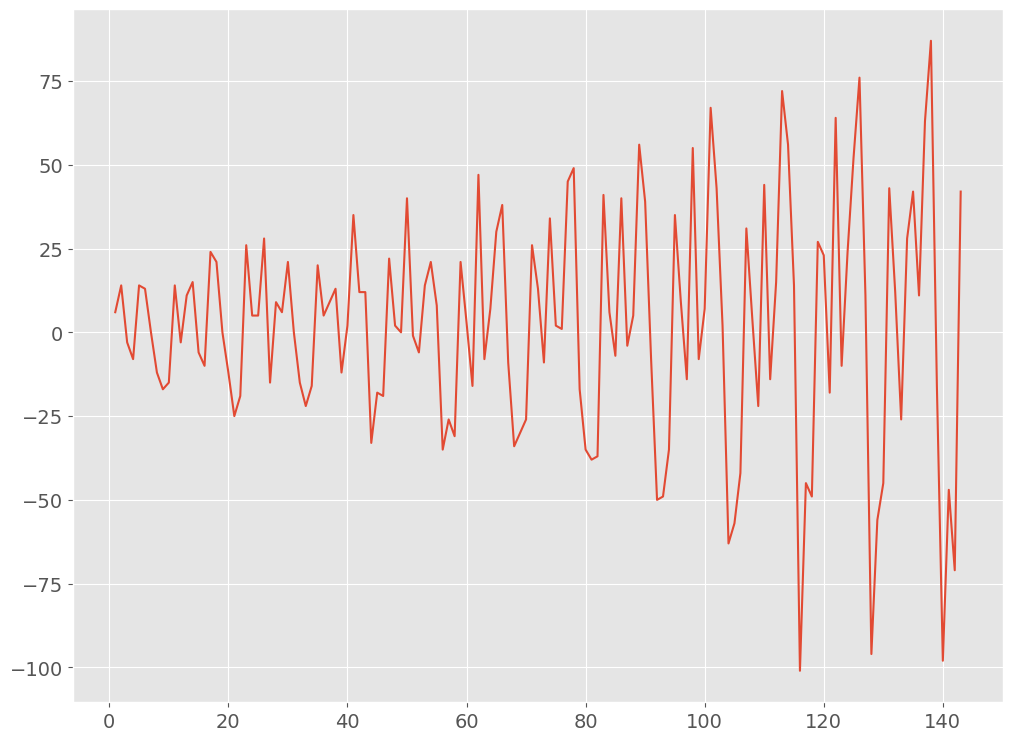

In [8]:
#1期前データとの差分

df_d1 = df.Passengers.diff(1).dropna()

df_d1.plot()
plt.show()

In [9]:
dftest=adfuller(df_d1)

print('ADF Statistic', dftest[0])
print('P-value', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
  print('\t',i ,j)

ADF Statistic -2.8292668241700047
P-value 0.05421329028382478
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


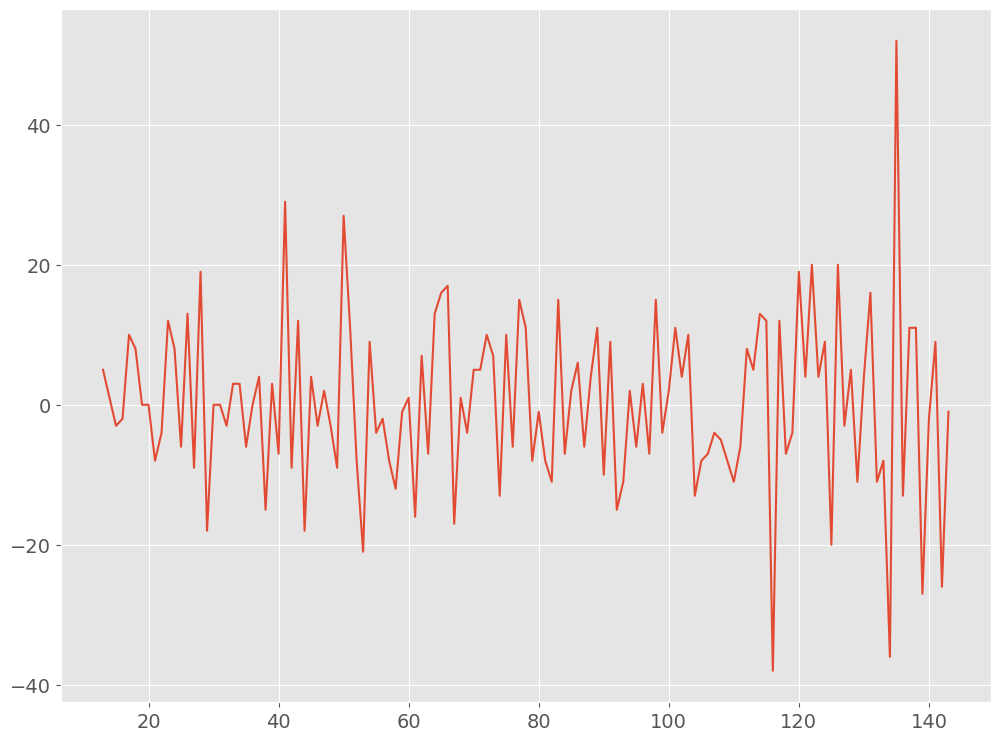

In [10]:
df_d1_d12 = df_d1.diff(12).dropna()

df_d1_d12.plot()
plt.show()

In [11]:
dftest=adfuller(df_d1_d12)

print('ADF Statistic', dftest[0])
print('P-value', dftest[1])
print('Critical values:')
for i, j in dftest[4].items():
  print('\t',i ,j)

ADF Statistic -15.595618083746338
P-value 1.856511600123444e-28
Critical values:
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


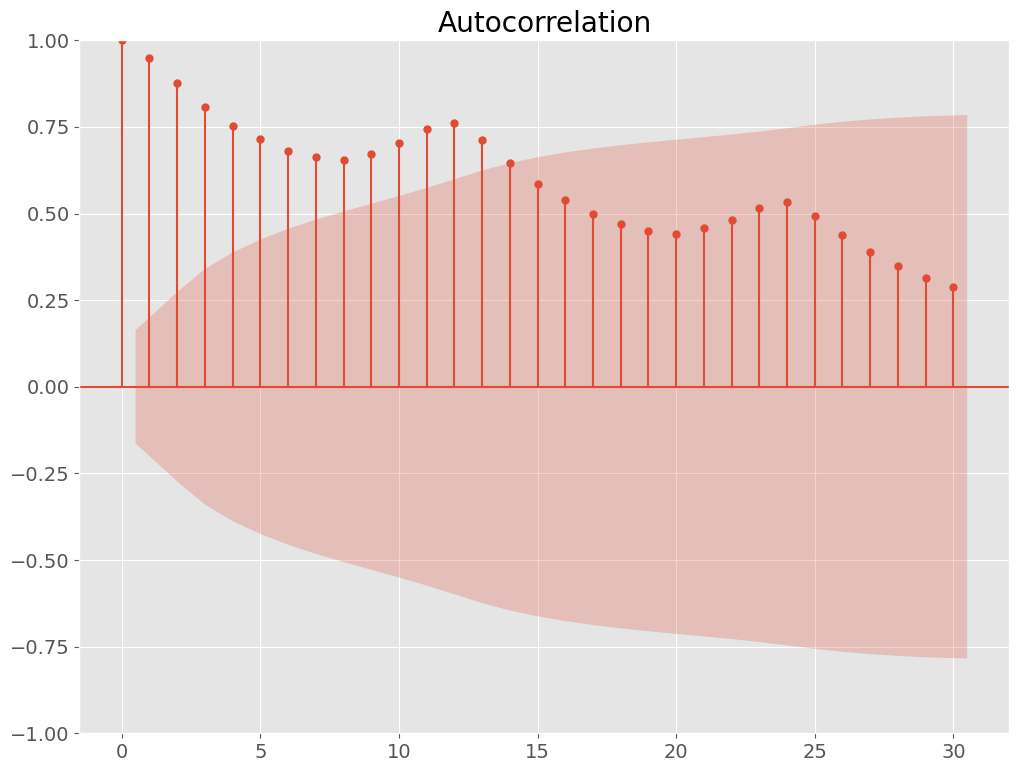

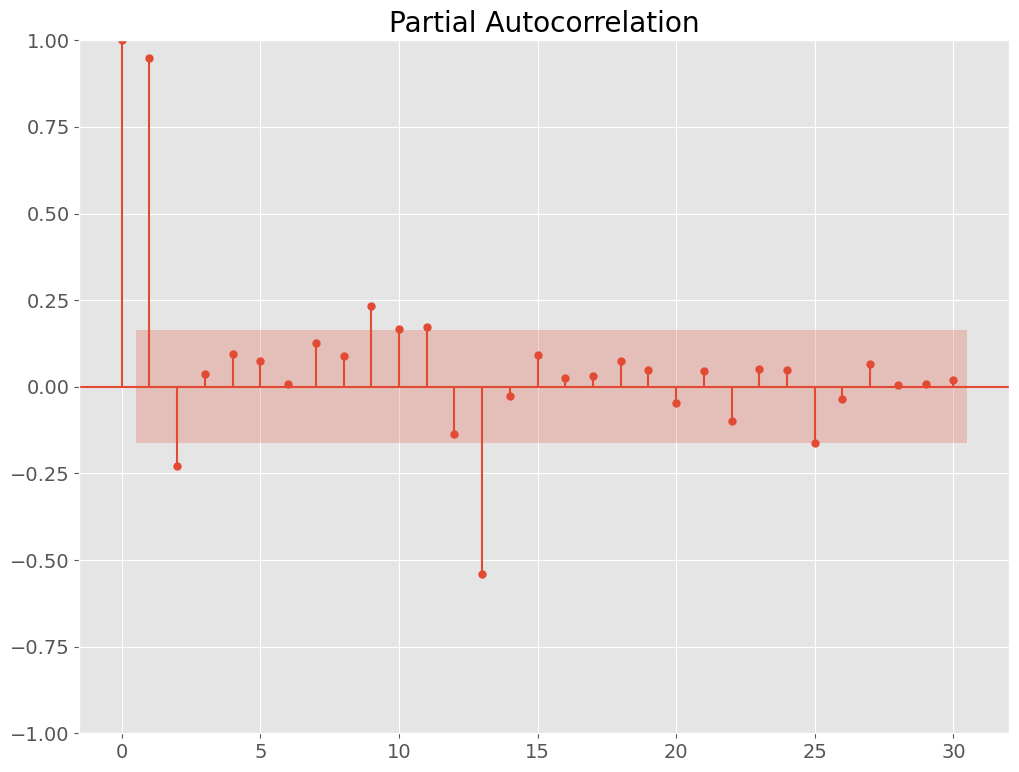

In [12]:
#これログラム
acf = plot_acf(df.Passengers, lags=30)
pacf = plot_pacf(df.Passengers, lags=30)

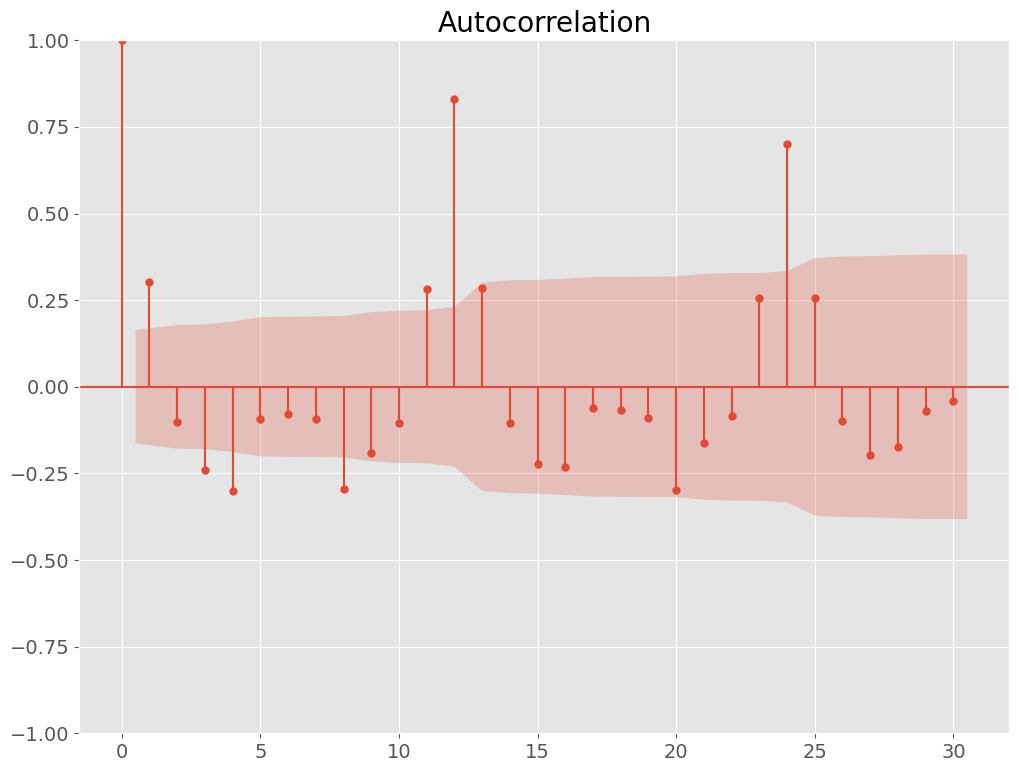

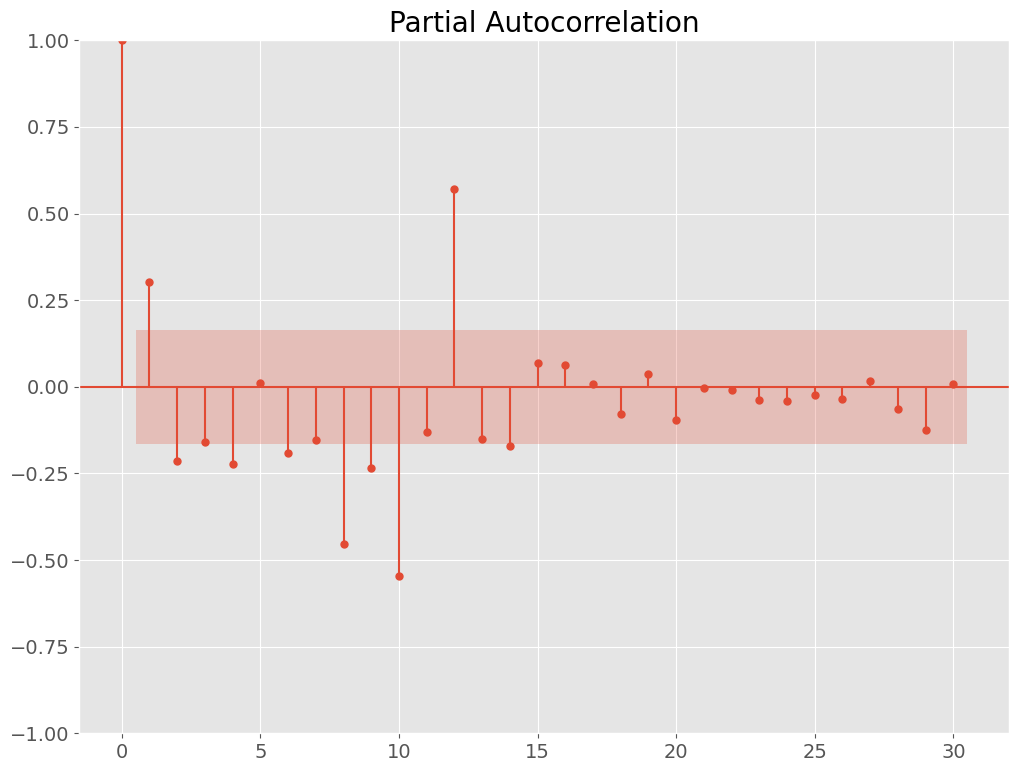

In [13]:
#これログラム1M差分
acf = plot_acf(df_d1, lags=30)
pacf = plot_pacf(df_d1, lags=30)

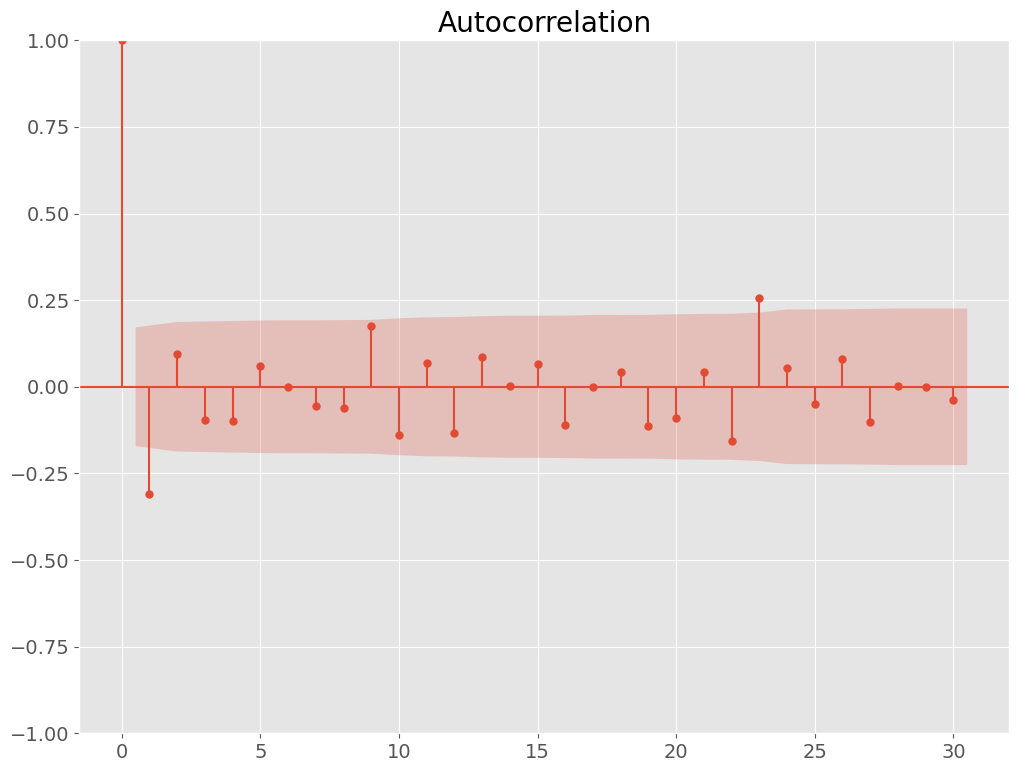

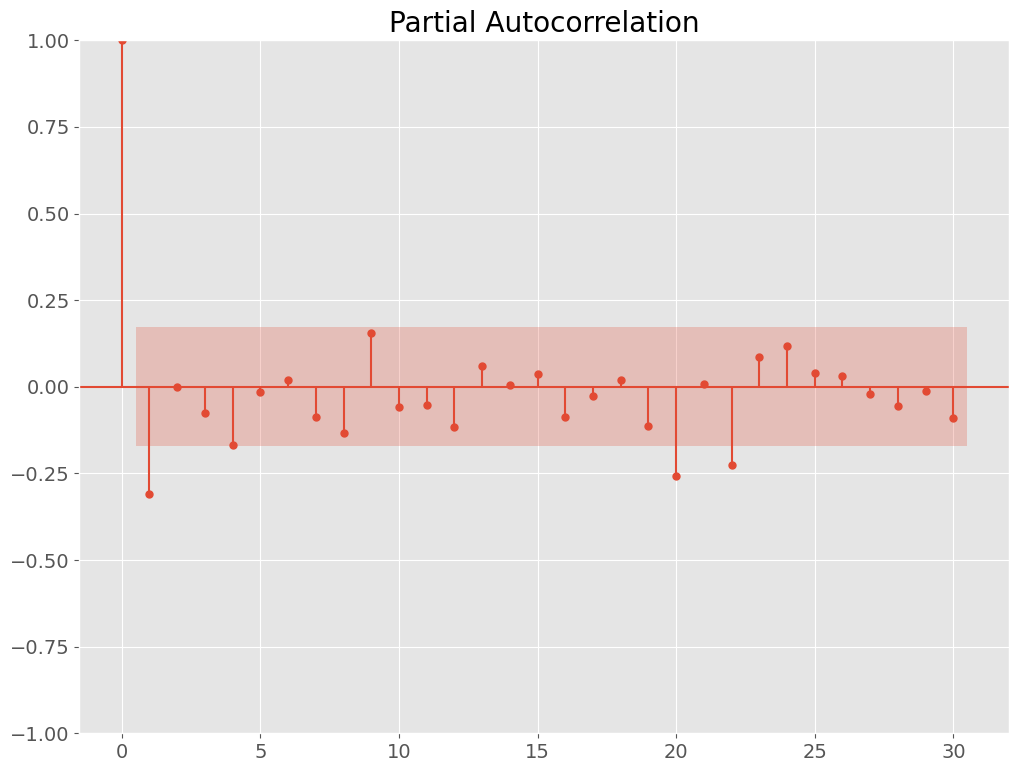

In [14]:
#これログラム12M
acf = plot_acf(df_d1_d12, lags=30)
pacf = plot_pacf(df_d1_d12, lags=30)

arima

In [17]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00


In [18]:
import datetime
from pmdarima import auto_arima
from pmdarima.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[12,9]
plt.rcParams['font.size']=14

In [33]:
df=pd.read_csv('/content/drive/MyDrive/AirPassengers.csv',
               index_col='Month',
               parse_dates=True)
df=df.dropna()
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [34]:
train, test = train_test_split(df,test_size=12)

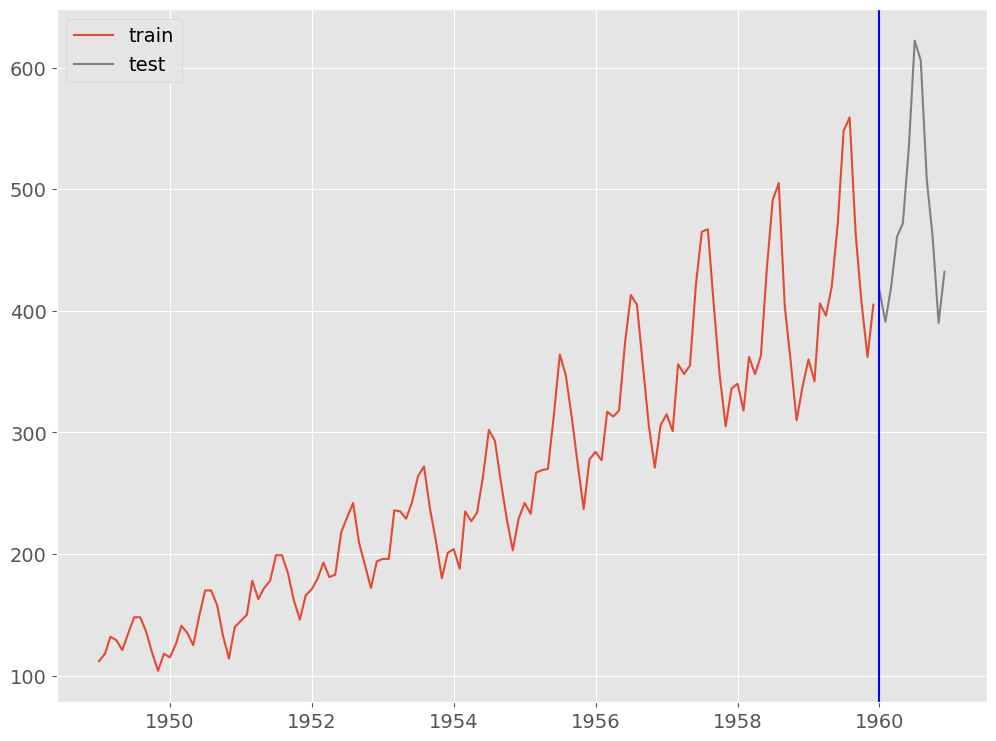

In [37]:
fig, ax = plt.subplots()
ax.plot(
    train.index,
    train.values,
    label='train'
)

ax.plot(
    test.index,
    test.values,
    label='test',
    color='gray'
)

ax.axvline(datetime.datetime(1960,1,1),
           color='blue')

ax.legend()

plt.show()

In [38]:
arima_model=auto_arima(
    train,
    seasonal=True,
    m=12)

print(arima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 20 Aug 2023   AIC                            905.686
Time:                                    13:04:20   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095   

In [39]:
train_pred = arima_model.predict_in_sample()

test_pred = arima_model.predict(n_periods=12)

In [40]:
print('RMSE:\n',
      np.sqrt(mean_squared_error(test.Passengers, test_pred)))
print('MAE:\n',
      mean_absolute_error(test.Passengers, test_pred))
print('MAPE:\n',
      mean_absolute_percentage_error(test.Passengers, test_pred))

RMSE:
 18.536468798006823
MAE:
 14.898208317448123
MAPE:
 0.030975615303185346


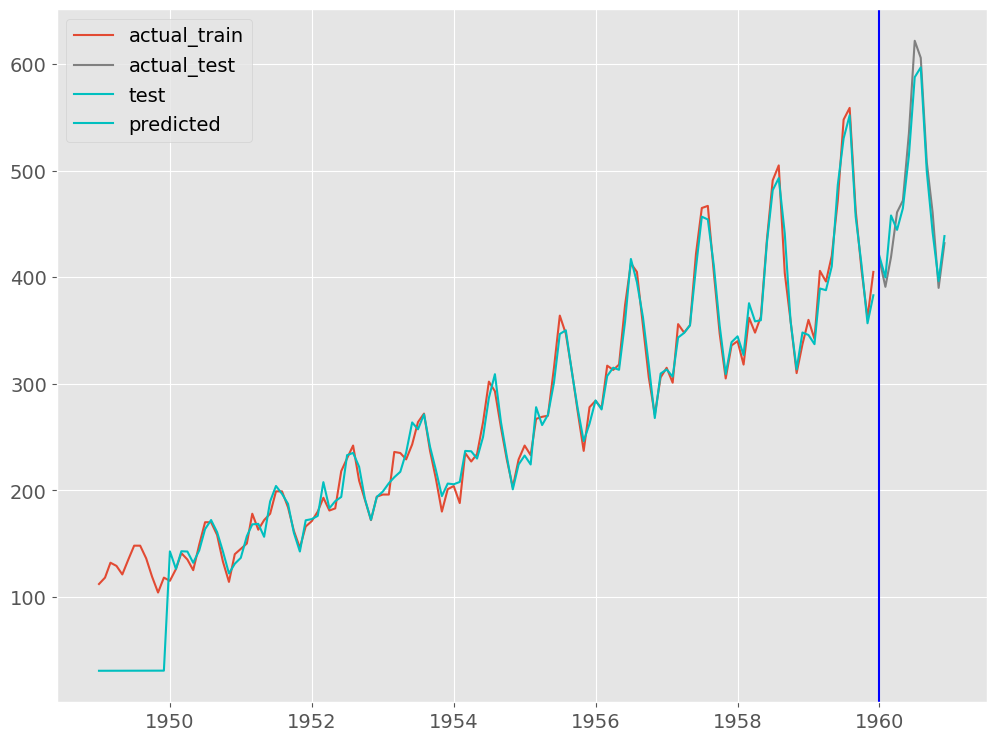

In [41]:
fig, ax = plt.subplots()
ax.plot(
    train.index,
    train.values,
    label='actual_train'
)

ax.plot(
    test.index,
    test.values,
    label='actual_test',
    color='gray'
)

ax.plot(
    train.index,
    train_pred,
    label='test',
    color='c'
)

ax.plot(
    test.index,
    test_pred,
    label='predicted',
    color='c'
)

ax.axvline(datetime.datetime(1960,1,1),
           color='blue')

ax.legend()

plt.show()